In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [178]:
def L(x, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return gamma / np.pi / (x**2 + gamma**2)


In [179]:
#StainlessSteelFoil_Jan13_firstData.Asc

SSData = np.transpose(np.loadtxt("StainlessSteelFoil_Jan13_firstData.Asc", skiprows=0))

channels = SSData[0]
counts = SSData[1]

#get errors on each point
countErr = [1/np.sqrt(i) for i in SSData[1]]
print(countErr[0])

0.005872202195147035


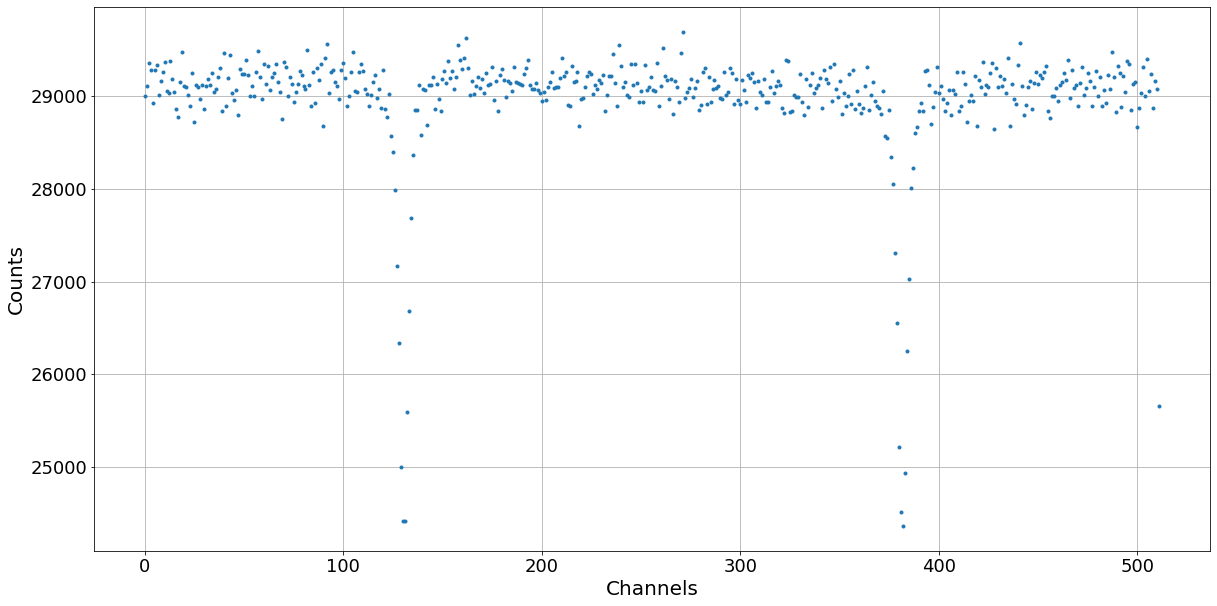

In [180]:
#plot of raw data - errors to small to be seen
plt.figure(figsize=(20,10))
plt.errorbar(channels, counts, yerr=countErr, fmt='.')
# plt.errorbar(x, y, yerr=countErr, fmt='o')
plt.ylabel('Counts', fontsize=20)
plt.xlabel('Channels', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid()
plt.show()

In [181]:
#last point is sig lower
print(channels[-1], counts[-1])

511.0 25656.0


In [238]:
def L2(x, gamma, mean):
    """ Return Lorentzian funct"""
    return (gamma/(2.0*np.pi)) * ( 1/( (x-mean)**2 +(gamma/2.0)**2 ))

In [239]:
maxVIN = counts.tolist().index(min(counts[0:250]))

popt_L, pcov_L = curve_fit(L2, channels[0:250], counts[0:250], p0=[20, maxVIN])
perr_L = np.sqrt(np.diag(pcov_L))

print(popt_L, perr_L)

#but funct doesn't got to 0, it has a really big offset

[ 17.09170636 131.18656833] [6519682.63309487 3266744.36645158]


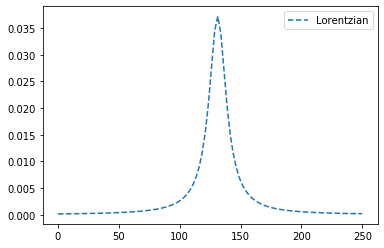

In [240]:
#messing with graphing a Lorentzian - really we need to fit it
# alpha, gamma = 0.1, 0.1
x = np.linspace(0,250,100)
pylab.plot(x, L2(x, popt_L[0],popt_L[1]), ls='--', label='Lorentzian')
# pylab.xlim(-0.8,0.8)
pylab.legend()
pylab.show()

In [235]:
import spinmob as s

my_fitter = s.data.fitter()
my_fitter.set_functions(f=L2, p='gamma=10,mean=120')
my_fitter.set_data(xdata=channels[0:250], ydata=counts[0:250], eydata=countErr[0:250])

TypeError: L2() missing 1 required positional argument: 'off'

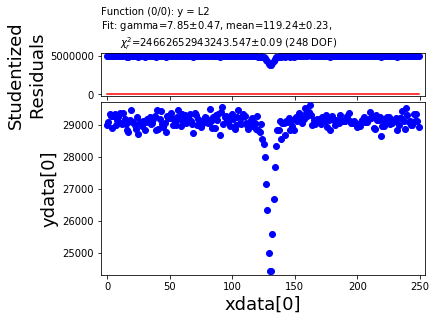


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [1000]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [True]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': 'o', 'color': 'b', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 24662653020902.59 +/- 0.09, 248.0 DOF)
  gamma      = 10.0
  mean       = 120.0

FIT RESULTS (reduced chi^2 = 24662652943243.547 +/- 0.09, 248 DOF)
  gamma      = 7.85 +/- 0.47
  mean    

In [212]:
my_fitter.fit()